In [19]:
import sys
import os
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import cyvcf2
from pybedtools import BedTool
if "/scratch/groups/mschatz1/aganezov/CHM13/variants" not in sys.path:
    sys.path.append("/scratch/groups/mschatz1/aganezov/CHM13/variants")
from sv_vcf2df import vcf_record2dict, get_vcf_df

In [5]:
samples = [
    ### GIAB
    "HG002",
    "HG003",
    "HG004",
    "HG005",
    "HG006",
    "HG007",
#     ### HPRC
    "HG00733",
    "HG01109",
    "HG01243",
    "HG02080",
    "HG02055",
    "HG02109",
    "HG02145",
    "HG02723",
    "HG03492",
    "HG03098",
    "HG01442",
]
techs = {
    "HG002": [
        "PBCCS",
        "ONT"
    ],
    "HG003": [
        "PBCCS",
        "ONT"
    ],
    "HG004": [
        "PBCCS",
        "ONT"
    ],
    "HG005": [
        "PBCCS",
        "ONT"
    ],
    "HG006": [
        "PBCCS",
        "ONT"
    ],
    "HG007": [
        "PBCCS",
        "ONT"
    ],
    "HG01109": [
        "PBCCS",
        "ONT"
    ],
    "HG01243": [
        "PBCCS",
        "ONT"
    ],
    "HG02080": [
        "PBCCS",
        "ONT"
    ],
    "HG02109": [
        "PBCCS",
    ],
    "HG02145": [
        "PBCCS",
    ],
    "HG02723": [
        "PBCCS",
        "ONT"
    ],
    "HG03492": [
        "PBCCS",
        "ONT"
    ],
    "HG03098": [
        "PBCCS",
        "ONT"
    ],
    "HG01442": [
        "PBCCS",
    ],
    "HG00733": [
        "PBCCS",
        "ONT"
    ],
    "HG02055": [
        "PBCCS",
        "ONT"
    ],
        }
aligners = [
    "mm2",
#     "ngmlr", 
    "wm",
]
references = [
#     "GRCh38", 
    "CHM13_20200921",
#     "GRCh38-1KGP",
    "GRCh38-noAD",
]

In [9]:
data_dirs = {
    "CHM13_20200921": "/scratch/groups/mschatz1/aganezov/CHM13/variants/CHM13_reads_alignment_based/20200921/svs",
#     "GRCh38" : "/scratch/groups/mschatz1/aganezov/CHM13/variants/GRCh38_reads_alignment_based/coverage",
#     "GRCh38-1KGP": "/scratch/groups/mschatz1/aganezov/CHM13/variants/1KGP_GRCh38_ref/rockfish",
    "GRCh38-noAD": "/scratch/groups/mschatz1/aganezov/CHM13/variants/noAD_GRCh38_ref/svs",
}

In [13]:
hc_intervals_sources = {
    "CHM13_20200921": "/scratch/groups/mschatz1/aganezov/CHM13/variants/CHM13_reads_alignment_based/HG002_GRCh38_1_22_v4.2_benchmark.over.v1.0.sort.bed",
    "GRCh38-noAD": "/scratch/groups/mschatz1/aganezov/CHM13/variants/noAD_GRCh38_ref/HG002_GRCh38_1_22_v4.2_benchmark.chr.bed"
}
hc_intervals_beds = {
    "CHM13_20200921": BedTool(hc_intervals_sources["CHM13_20200921"]),
    "GRCh38-noAD": BedTool(hc_intervals_sources["GRCh38-noAD"])
}

In [14]:
genic_intervals_sources = {
    "CHM13_20200921": "/scratch/groups/mschatz1/aganezov/CHM13/variants/CHM13_reads_alignment_based/GRCh38_ENSEMBL_genes_biomart_version_100.over.chain.T2Tv1.0.bed",
    "GRCh38-noAD": "/scratch/groups/mschatz1/aganezov/CHM13/variants/noAD_GRCh38_ref/rockfish/GRCh38_ENSEMBL_genes_biomart_version_100.bed"
}
genic_intervals_beds = {
    "CHM13_20200921": BedTool(genic_intervals_sources["CHM13_20200921"]),
    "GRCh38-noAD": BedTool(genic_intervals_sources["GRCh38-noAD"])
}

In [49]:
def vcf2df(vcf_path, sample=None, ref=None) -> pd.DataFrame:
    return get_vcf_df(cyvcf2.VCF(vcf_path), sample=sample, ref=ref)

In [26]:
def vcf_basename(sample, ref, tech, aligner, suffix="_sniffles.s2l20.refined.nSVtypes.ism.vcf"):
    return f"{sample}v{ref}_{aligner}_{tech}{suffix}"

In [38]:
genic_subdir = "GENIC"
hc_subdir = "GIABhc"

In [48]:
for ref in references:
    for aligner in aligners:
        for sample in samples:
            for tech in techs[sample]:
                data_dir = data_dirs[ref]
                genic_bed = genic_intervals_beds[ref]
                hc_bed = hc_intervals_beds[ref]
                
                basename = vcf_basename(sample, ref.split("-")[0], tech, aligner)
                full_path = os.path.join(data_dir, basename)
                
                
                genic_dir_path = os.path.join(data_dir, genic_subdir)
                os.makedirs(genic_dir_path, exist_ok=True)
                vcf_bed = BedTool(full_path)
                genic_vcf_basename = vcf_basename(sample, ref.split("-")[0], tech, aligner, suffix="_sniffles.s2l20.refined.nSVtypes.ism.genic.vcf")
                full_genic_vcf_name = os.path.join(genic_dir_path, genic_vcf_basename)
                vcf_bed.intersect(genic_bed, wa=True, u=True, header=True).saveas(full_genic_vcf_name)
                
                hc_dir_path = os.path.join(data_dir, hc_subdir)
                os.makedirs(hc_dir_path, exist_ok=True)
                hc_vcf_basename = vcf_basename(sample, ref.split("-")[0], tech, aligner, suffix="_sniffles.s2l20.refined.nSVtypes.ism.HC.vcf")
                full_hc_vcf_name = os.path.join(hc_dir_path, hc_vcf_basename)
                vcf_bed.intersect(hc_bed, wa=True, u=True, header=True).saveas(full_hc_vcf_name)
                

/home-4/saganez1@jhu.edu/code/aganezov/miniconda3/envs/bio/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home-4/saganez1@jhu.edu/code/aganezov/miniconda3/envs/bio/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home-4/saganez1@jhu.edu/code/aganezov/miniconda3/envs/bio/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home-4/saganez1@jhu.edu/code/aganezov/miniconda3/envs/bio/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread,

In [86]:
dataframes = []
for ref in references:
    for aligner in aligners:
        for sample in samples[:6]:
            for tech in techs[sample]:
                print(f"processing {sample} {tech} {aligner} {ref}")
                data_dir = data_dirs[ref]
                basename = vcf_basename(sample, ref.split("-")[0], tech, aligner)
                full_vcf_path = os.path.join(data_dir, basename)
                full_vcf_df = vcf2df(full_vcf_path, sample=sample, ref=ref)
                full_vcf_df["aligner"] = aligner
                full_vcf_df["tech"] = tech
                full_vcf_df["group"] = "full"
                dataframes.append(full_vcf_df)
                genic_dir_path = os.path.join(data_dir, genic_subdir)
                genic_vcf_basename = vcf_basename(sample, ref.split("-")[0], tech, aligner, suffix="_sniffles.s2l20.refined.nSVtypes.ism.genic.vcf")
                full_genic_vcf_name = os.path.join(genic_dir_path, genic_vcf_basename)
                full_genic_vcf_df = vcf2df(full_genic_vcf_name, sample=sample, ref=ref)
                full_genic_vcf_df["aligner"] = aligner
                full_genic_vcf_df["tech"] = tech
                full_genic_vcf_df["group"] = "genic"
                dataframes.append(full_genic_vcf_df)
                hc_dir_path = os.path.join(data_dir, hc_subdir)
                hc_vcf_basename = vcf_basename(sample, ref.split("-")[0], tech, aligner, suffix="_sniffles.s2l20.refined.nSVtypes.ism.HC.vcf")
                full_hc_vcf_name = os.path.join(hc_dir_path, hc_vcf_basename)
                full_hc_vcf_df = vcf2df(full_hc_vcf_name, sample=sample, ref=ref)
                full_hc_vcf_df["aligner"] = aligner
                full_hc_vcf_df["tech"] = tech
                full_hc_vcf_df["group"] = "hc"
                dataframes.append(full_hc_vcf_df)
vcf_df = pd.concat(dataframes)

processing HG002 PBCCS mm2 CHM13_20200921
processing HG002 ONT mm2 CHM13_20200921
processing HG003 PBCCS mm2 CHM13_20200921
processing HG003 ONT mm2 CHM13_20200921
processing HG004 PBCCS mm2 CHM13_20200921
processing HG004 ONT mm2 CHM13_20200921
processing HG005 PBCCS mm2 CHM13_20200921
processing HG005 ONT mm2 CHM13_20200921
processing HG006 PBCCS mm2 CHM13_20200921
processing HG006 ONT mm2 CHM13_20200921
processing HG007 PBCCS mm2 CHM13_20200921
processing HG007 ONT mm2 CHM13_20200921
processing HG002 PBCCS wm CHM13_20200921
processing HG002 ONT wm CHM13_20200921
processing HG003 PBCCS wm CHM13_20200921
processing HG003 ONT wm CHM13_20200921
processing HG004 PBCCS wm CHM13_20200921
processing HG004 ONT wm CHM13_20200921
processing HG005 PBCCS wm CHM13_20200921
processing HG005 ONT wm CHM13_20200921
processing HG006 PBCCS wm CHM13_20200921
processing HG006 ONT wm CHM13_20200921
processing HG007 PBCCS wm CHM13_20200921
processing HG007 ONT wm CHM13_20200921
processing HG002 PBCCS mm2 G

In [88]:
AUTOSOMES = {"chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr20", "chr21", "chr22"}
vcf_df = vcf_df[(vcf_df.CHR1.isin(AUTOSOMES)) & (vcf_df.CHR2.isin(AUTOSOMES))]

In [89]:
vcf_df["ABS_SIZE"] = vcf_df["SIZE"].abs()

<ipython-input-89-0c009ae518cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vcf_df["ABS_SIZE"] = vcf_df["SIZE"].abs()


In [67]:
vcf_df

,CHR1,CHR2,START,END,SIZE,SVTYPE,OR_SVTYPE,RE,SPECIFIC,PRECISE,STRANDS,SUPP_VEC,GT,sample,ref,aligner,tech,group,ABS_SIZE
0,chr1,chr1,3463,3463,47,INS,INS,7,0,True,+-,1,0/1,HG002,CHM13_20200921,mm2,PBCCS,full,47
1,chr1,chr1,36529,36597,-68,DEL,DEL,10,1,False,+-,1,0/0,HG002,CHM13_20200921,mm2,PBCCS,full,68
2,chr1,chr1,36526,36526,881,INS,INS,2,0,False,+-,1,0/0,HG002,CHM13_20200921,mm2,PBCCS,full,881
3,chr1,chr1,36801,36801,876,INS,INS,8,1,True,+-,1,0/0,HG002,CHM13_20200921,mm2,PBCCS,full,876
4,chr1,chr1,37807,37807,726,INS,INS,11,1,True,+-,1,0/1,HG002,CHM13_20200921,mm2,PBCCS,full,726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28252,chr9,chr11,117079946,24371561,1,TRA,BND,4,0,True,++,1,0/0,HG007,GRCh38-noAD,mm2,ONT,hc,1
28253,chr11,chr14,62074343,81320430,1,TRA,BND,8,0,True,+-,1,0/0,HG007,GRCh38-noAD,mm2,ONT,hc,1
28254,chr12,chr13,9872815,86269523,1,TRA,BND,4,0,True,--,1,0/0,HG007,GRCh38-noAD,mm2,ONT,hc,1
28255,chr12,chr20,21785040,48961543,1,TRA,BND,3,0,True,-+,1,0/0,HG007,GRCh38-noAD,mm2,ONT,hc,1


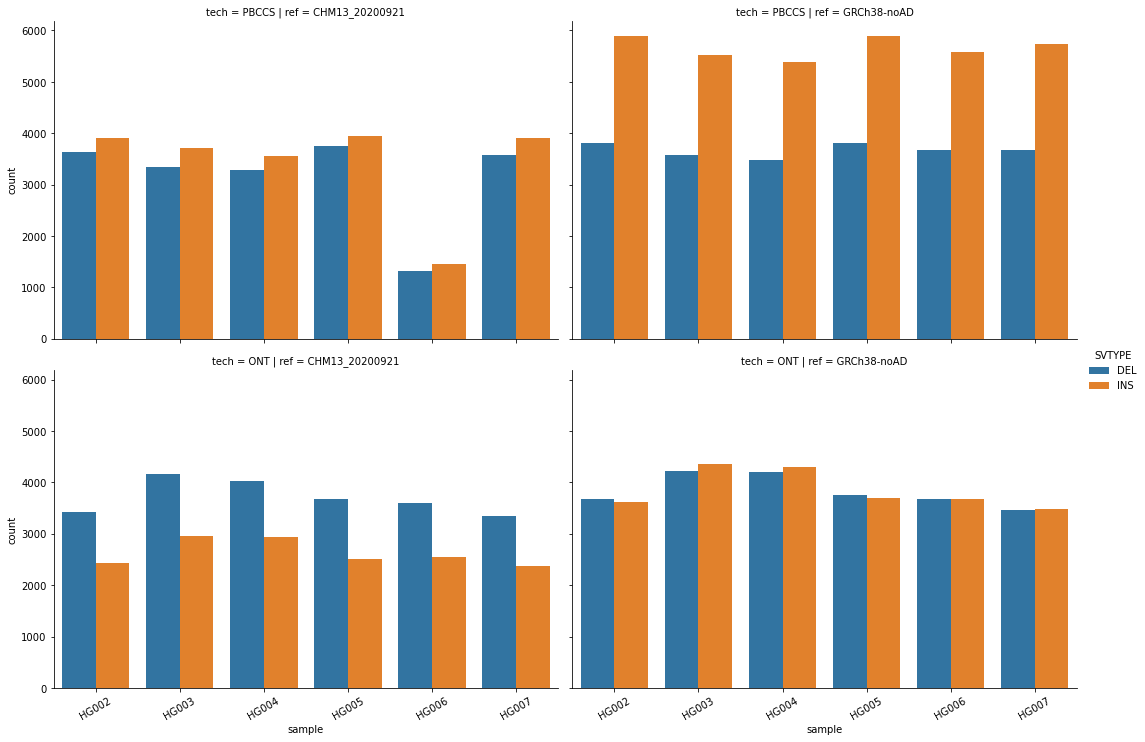

In [90]:
aligner = "wm"
min_size = 30
group = "genic"
allg = sns.catplot(data=vcf_df
                    [
                        (vcf_df["SVTYPE"].isin({"INS", "DEL"}))
                        & (vcf_df.aligner == aligner)
                        & (vcf_df.SPECIFIC == "1")
                        & (vcf_df.PRECISE) 
                        & (vcf_df["ABS_SIZE"] < 100000)
                        & (vcf_df["ABS_SIZE"] >= 50)
                        & (vcf_df["group"] == group)
                    ],
           x="sample", kind="count", hue="SVTYPE", col="ref", row="tech", aspect=1.5)
allg.set_xticklabels(rotation=30)
# allg.savefig(f"ONT_{aligner}_sv_indel_total_cnt__cross_ref_min_size_{min_size}.png", dpi=150)

In [75]:
vcf_df                    [
                        (vcf_df["SVTYPE"].isin({"INS", "DEL"}))
                        & (vcf_df.aligner == aligner)
                        & (vcf_df.SPECIFIC)
                        & (vcf_df.PRECISE) 
                        & (vcf_df["ABS_SIZE"] < 100000)
                        & (vcf_df["ABS_SIZE"] >= 30)
                        & (vcf_df["group"] == group)
                    ]

,CHR1,CHR2,START,END,SIZE,SVTYPE,OR_SVTYPE,RE,SPECIFIC,PRECISE,STRANDS,SUPP_VEC,GT,sample,ref,aligner,tech,group,ABS_SIZE
0,chr1,chr1,3463,3463,47,INS,INS,7,0,True,+-,1,0/1,HG002,CHM13_20200921,mm2,PBCCS,full,47
3,chr1,chr1,36801,36801,876,INS,INS,8,1,True,+-,1,0/0,HG002,CHM13_20200921,mm2,PBCCS,full,876
4,chr1,chr1,37807,37807,726,INS,INS,11,1,True,+-,1,0/1,HG002,CHM13_20200921,mm2,PBCCS,full,726
5,chr1,chr1,153913,153913,49,INS,INS,4,0,True,+-,1,0/0,HG002,CHM13_20200921,mm2,PBCCS,full,49
8,chr1,chr1,242960,243057,-97,DEL,DEL,24,1,True,+-,1,0/1,HG002,CHM13_20200921,mm2,PBCCS,full,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153230,chr10,chr10,38913440,38918280,-4840,DEL,DEL,10,1,True,+-,1,1/1,HG007,GRCh38-noAD,mm2,ONT,full,4840
153231,chr10,chr10,38913440,38913440,4897,INS,INS,2,0,True,+-,1,1/1,HG007,GRCh38-noAD,mm2,ONT,full,4897
153232,chr10,chr10,38920346,38920346,2077,INS,DUP,6,0,True,+-,1,1/1,HG007,GRCh38-noAD,mm2,ONT,full,2077
153333,chr4,chr4,49286028,49286028,88,INS,DUP,6,0,True,+-,1,1/1,HG007,GRCh38-noAD,mm2,ONT,full,88
